#  ПРИКЛАД ВИКОНАННЯ ЛАБОРАТОРНОЇ РОБОТИ № 2
#  2. ГІСТОГРАМА

## ДИВИСЬ https://scikit-image.org/docs/stable/index.html

In [1]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
plt.rcParams['font.size'] = 18

In [2]:
## Завантаження файлу зображення
## filename = 'd:/_Doc_Vol_My_/_GIT_/2020/2020_Digita_Image_Processing/Test_Images/io_test_01.jpg'
filename = 'd:/_Doc_Vol_My_/_GIT_/2020/2020_Digita_Image_Processing/Test_Images/COCO_test_000579836.jpg'
test_im = io.imread(filename)
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
## rows_num = len(test_im)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

IMAGE SHAPE (480, 640, 3) IMAGE SIZE 921600
ROWS NUMBER 480 CLMS NUMBER 640 PIX NUMBER 307200 Bins 256


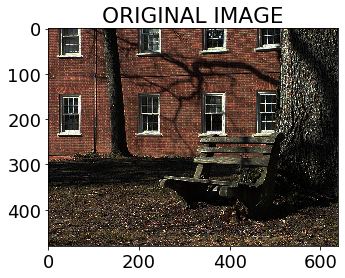

In [3]:
## Вивід оррігінального зображення на екран
plt.title('ORIGINAL IMAGE')
plt.imshow(test_im)
plt.show()

Gray_Im SAPE (480, 640, 3) Gray_Im SIZE 307200
L_Gisto SHAPE (256,) L_Gisto SIZE 256


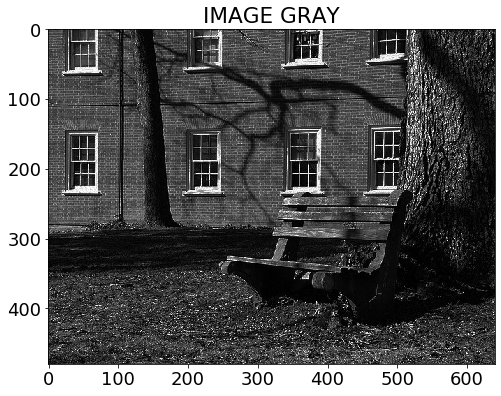

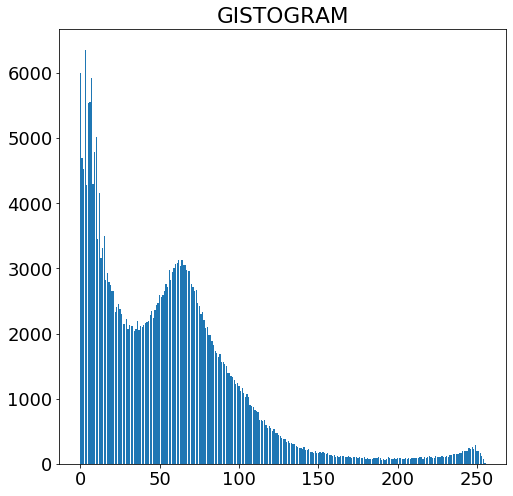

In [4]:
## Визначення масиву для гістограми
gray_im = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint8)
L_gisto = np.zeros ( (bins), dtype=np.uint32)
print ('Gray_Im SAPE', gray_im.shape, 'Gray_Im SIZE', rows_num * clms_num)
print ('L_Gisto SHAPE', L_gisto.shape, 'L_Gisto SIZE', L_gisto.size)

for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        gray_im [i, j, :] = 0.299*test_im [i, j, 0]+0.587*test_im [i, j, 1]+0.114*test_im [ i, j, 2]
        L_gisto[gray_im [i, j, 0]] += 1 
        
## print (L_gisto)
## sum = np.sum(L_gisto)
## print ('SUMMA = ', sum)    
    
        ## Вивід напівсірого зображення на екран
plt.figure(figsize=(8, 8)) ## Визначаємо розмір фігури

plt.title('IMAGE GRAY')
plt.imshow(gray_im)
plt.show()        

pix_index = np.arange(256) 
fig, ax = plt.subplots(figsize=(8,8))
plt.title('GISTOGRAM')
ax.bar(pix_index, L_gisto)
plt.show()        


In [5]:
## Зберігання напівтонового зображення до файлу
#### skimage.io.imsave(fname, arr, plugin=None, check_contrast=True, **plugin_args)
out_filename = 'd:/_Doc_Vol_My_/_GIT_/2020/2020_Digita_Image_Processing/Test_Images/COCO_test_000579836_Gray.jpg'
io.imsave(out_filename,gray_im)

In [6]:
## Формування та зберігання тільки напівтонового L_каналу до файлу в форматі BMP
image_gray_channal = np.zeros ( (rows_num , clms_num), dtype=np.uint8)
for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        image_gray_channal [i, j] = gray_im[i, j, 0]

In [7]:
## Зберігання напівтонового орігіналу
out_filename = 'd:/_Doc_Vol_My_/_GIT_/2020/2020_Digita_Image_Processing/Test_Images/COCO_test_000579836_Gray_1chan.bmp'
io.imsave(out_filename,image_gray_channal)

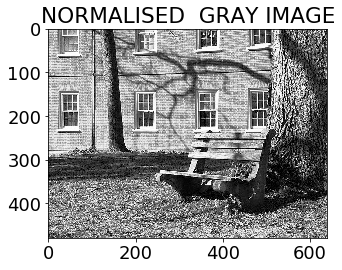

In [8]:
## Нормалізування гістограми
## https://habr.com/ru/post/244507/
Norm_L_gisto = np.zeros ( (256), dtype=np.float32)
Norm_L_gisto [:] =  255.0*L_gisto[:]/pix_num
norm_sum = np.sum(Norm_L_gisto)
##print (Norm_L_gisto)
##print (norm_sum)
## Кумулятивна гістограма
Cum_gisto = np.zeros ( (256), dtype=np.float32)
for i in  range (bins):
    Cum_gisto[i] = np.sum(Norm_L_gisto[0:i])

norm_image = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint8)    
for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        norm_image [i, j, : ] = Cum_gisto[image_gray_channal[i,j]] 

plt.figure(figsize=(5, 5)) ## ЗАДАЕМ РАЗМЕР ВЫВОДИМОЙ ФИГУРЫ
plt.title('NORMALISED  GRAY IMAGE')
plt.imshow(norm_image)
plt.show()        
    


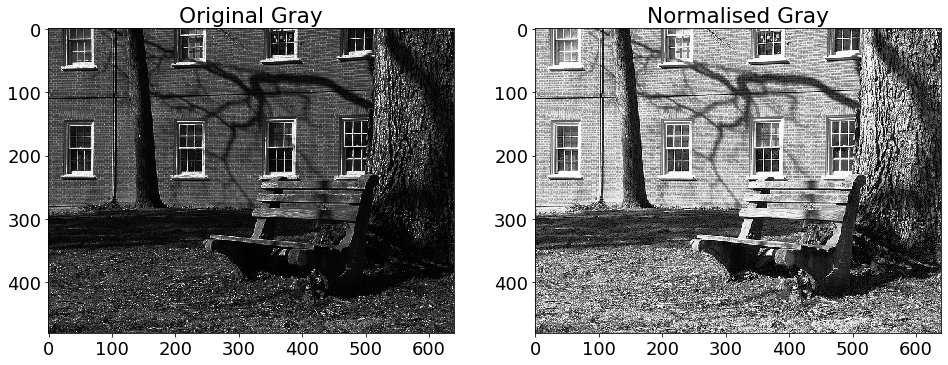

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(gray_im)
ax[0].set_title("Original Gray")
ax[1].imshow(norm_image)
ax[1].set_title("Normalised Gray")
plt.show()

In [10]:
## Зберігання номалізованого напівтонового орігіналу
out_filename = 'd:/_Doc_Vol_My_/_GIT_/2020/2020_Digita_Image_Processing/Test_Images/COCO_test_000579836_Gray_normalised.bmp'
io.imsave(out_filename,image_gray_channal)

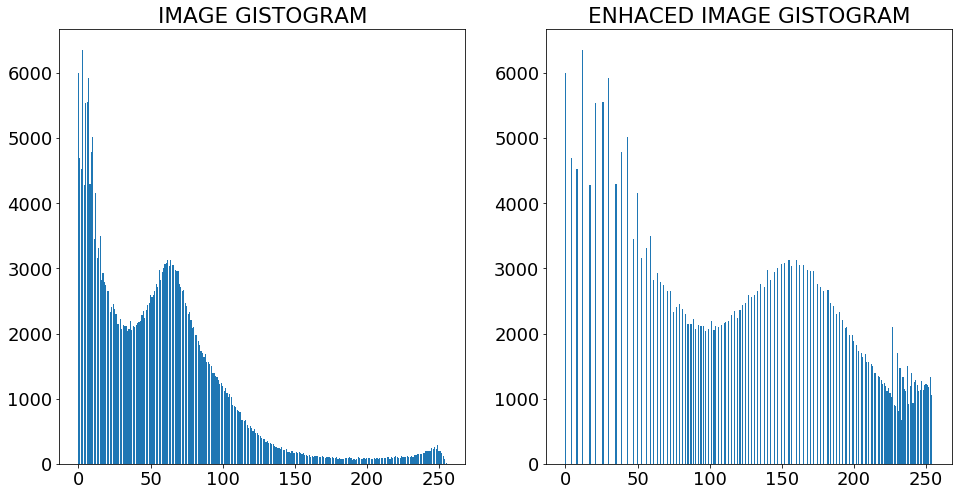

In [11]:
## Визначення масиву для нової гістограми
L_gisto_enh = np.zeros ( (bins), dtype=np.uint32)

for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        L_gisto_enh[norm_image [i, j, 0]] += 1 

        pix_index = np.arange(256) 

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax = axs[0]
ax.bar(pix_index, L_gisto)
ax.set_title('IMAGE GISTOGRAM')
ax = axs[1]
ax.bar(pix_index, L_gisto_enh)
ax.set_title('ENHACED IMAGE GISTOGRAM')
plt.show()        